# MNIST
* Problem: classify greyscale images of handwritten digits (28 pixels by 28 pixels) into their 10 categories (0 to 9) 
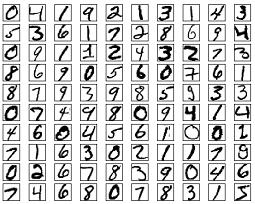
[Michael Nielsen, Neural Networks and Deep Learning, Determination Press, 2015](http://neuralnetworksanddeeplearning.com) [License](https://creativecommons.org/licenses/by-nc/3.0/deed.en_GB)
* 60,000 training images, plus 10,000 test images

# Samples, labels and classes
- A category in a classification problem is called a class
- A datum is a sample 
- The class associated with a specific sample is also known as the label

- We will build and train an artificial neural network (ANN) to classify handwritten digits in fewer than 20 lines of Python code
- The MNIST dataset comes pre-loaded in tensorflow.keras, in the form of a set of four Numpy arrays:

In [1]:
import tensorflow as tf
print(tf.__version__, ' ', tf.keras.__version__)

2.0.0   2.2.4-tf


In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Training and Test Set
- `train_images` and `train_labels` form the training set
- The model will learn from the training set 
- The model will be tested on `test_images` and `test_labels`, the test set 



# Images and NumPy arrays
- Images encoded as NumPy arrays; the labels are simply an array of digits, ranging from 0 to 9. 
- One-to-one correspondence between the images and the labels

In [15]:
def info(s, x):
    print(s, "=", "\n", x, '\nlen =', len(x), '\nshape =', x.shape, '\n')
    
info('train images', train_images)
info('train labels', train_labels)
info('test images', test_images)
info('test labels', test_labels)

info('train image [0]', train_images[0])
print('train label [0] =', train_labels[0])


train images = 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] 
len = 60000 
shape = (60000, 28, 28) 

train labels = 
 [5 0 4 ... 5 6 8] 
len = 60000 
shape = (60000,) 

test images = 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]

# Workflow

1. Present the training data 

2. Train the network to associate images and labels 

3. Produce predictions for test images

# Layers

- The core building blocks are layers of artificial neurons/units
- Each layer is a data-processing module
- Layers transform input data into more abstract representations
- Layers are chained together in a dense network
- A DL model is a succession of increasingly refined data

# The network

- In this case: the network is a sequence of two dense layers
- Dense means fully-connected - the output of a unit in layer $k$ is linked to all units in layer $k + 1$
<img src="images/tikz12.png">
- The input in the diagram emanates from a non-computational layer
- This input layer is not a conventional layer because it does not perform any computation


[Michael Nielsen, Neural Networks and Deep Learning, Determination Press, 2015](http://neuralnetworksanddeeplearning.com) [License](https://creativecommons.org/licenses/by-nc/3.0/deed.en_GB)

- The units in the first layer have a rectified linear activation function (relu)
- They are called rectified linear units
- `relu(x)` $= \max(0, x)$

- The second (and last) layer will be a 10-way 'softmax' layer which means it will return an array of 10 scores
- and each score is in the interval $[0, 1]$ and the scores sum to 1 
- The scores can be interpreted as a probability distribution - the probability that the current digit image belongs to one of the 10 digit classes

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Loss, optimiser and performance metrics

- The **loss function** measures how well the network classifies the training data
- An **optimiser**: the network update algorithm. The update depends on the bundle of input data (a mini-batch) and the loss function
- **Metrics** monitor training and testing. Here we will only monitor **accuracy** (the fraction of the images that are correctly classified)

In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Preparing the image data

- Data is generally preprocessed
- The MNIST training images are stored in an array of 60000 pixel maps of 28 x 28 pxl of type `uint8` and values range in {0, 1, ..., 255} 
- The array is reshaped into a `float32` array of **shape** (60000, 28 * 28) with floating point values between 0 and 1

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

- The labels are categorically encoded:

In [7]:
from tensorflow.keras.utils import to_categorical

print(train_labels[0:4])
train_labels = to_categorical(train_labels)
print(train_labels[0:4])

test_labels = to_categorical(test_labels)

[5 0 4 1]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Training 

- All set to train!
- The model is *fitted* to its training data
- This is easy in Keras: call `fit`
- Two quantities will be displayed during training:
    - the loss of the network over the training data
    - the accuracy of the network over the training data
- An epoch is a complete pass over the training set
- Each pass is split into **mini-batches**

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2554 - accuracy: 0.9255
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1020 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0673 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0485 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0374 - accuracy: 0.9884


# Testing

- Training accuracy is about 98.9% after five training epochs
- How does the model performs on the test set?

In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [10]:
print('test_acc:', test_acc)

test_acc: 0.9759


# Evaluation

- Test set accuracy ~98% is lower than the training set accuracy
- This gap between training accuracy and test accuracy is an example of **overfitting**
- Machine learning models tend to perform worse on new data than on their training data 
 


# Look ahead

- Clarify what is really going on behind the scenes 
- *Tensors*, the data-storing objects going into the network
- Tensor operations
- Gradient descent - how the network actually trains